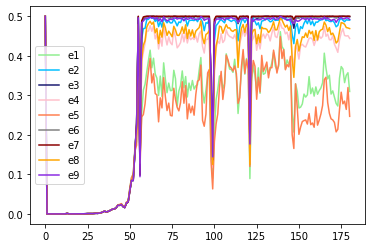

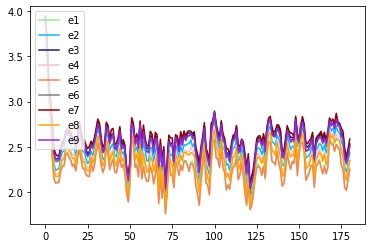

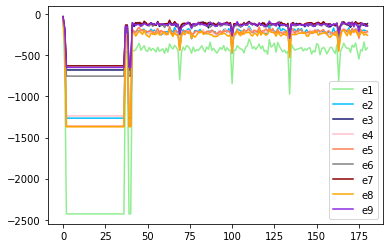

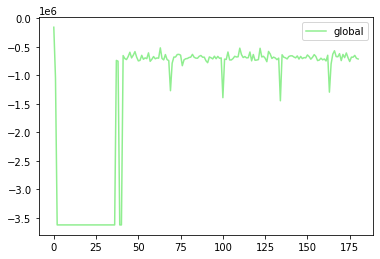

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)

file_name = "/home/neardws/acme/4db30952-f2e5-11ec-a043-04d9f5632a58/"
file_name = "/home/neardws/acme/625bc86e-f2f2-11ec-ba16-04d9f5632a58/"
file_name = "/home/neardws/acme/aed0e654-f2f5-11ec-8410-04d9f5632a58/"

file_name = "/home/neardws/acme/cffb0e9e-f2f6-11ec-bcdb-04d9f5632a58/"
file_name = "/home/neardws/acme/7b5c6cb4-f2f8-11ec-83ca-04d9f5632a58/"

loss_file_name = file_name + "logs/learner/logs.csv"
returns_file_name = file_name + "logs/evaluator/logs.csv"

name=["actor_episodes", "actor_steps", "critic_loss_0", "critic_loss_1", "critic_loss_2", "critic_loss_3", "critic_loss_4", "critic_loss_5", "critic_loss_6", "critic_loss_7", "critic_loss_8", "evaluator_episodes", "evaluator_steps", "learner_steps", "learner_walltime", "policy_loss_0", "policy_loss_1", "policy_loss_2", "policy_loss_3", "policy_loss_4", "policy_loss_5", "policy_loss_6", "policy_loss_7", "policy_loss_8"]
loss_df = pd.read_csv(loss_file_name, names=name, header=0)

e1_policy_loss = loss_df["policy_loss_0"].values.tolist()
e2_policy_loss = loss_df["policy_loss_1"].values.tolist()
e3_policy_loss = loss_df["policy_loss_2"].values.tolist()
e4_policy_loss = loss_df["policy_loss_3"].values.tolist()
e5_policy_loss = loss_df["policy_loss_4"].values.tolist()
e6_policy_loss = loss_df["policy_loss_5"].values.tolist()
e7_policy_loss = loss_df["policy_loss_6"].values.tolist()
e8_policy_loss = loss_df["policy_loss_7"].values.tolist()
e9_policy_loss = loss_df["policy_loss_8"].values.tolist()
epoch_index = [i for i in range(len(e1_policy_loss))]

plt.plot(epoch_index, e1_policy_loss, '-', color='lightgreen', label='e1')
plt.plot(epoch_index, e2_policy_loss, '-', color='deepskyblue', label='e2')
plt.plot(epoch_index, e3_policy_loss, '-', color='midnightblue', label='e3')
plt.plot(epoch_index, e4_policy_loss, '-', color='pink', label='e4')
plt.plot(epoch_index, e5_policy_loss, '-', color='coral', label='e5')
plt.plot(epoch_index, e6_policy_loss, '-', color='gray', label='e6')
plt.plot(epoch_index, e7_policy_loss, '-', color='darkred', label='e7')
plt.plot(epoch_index, e8_policy_loss, '-', color='orange', label='e8')
plt.plot(epoch_index, e9_policy_loss, '-', color='blueviolet', label='e9')
plt.legend(loc="best")  # 图例
plt.show()


e1_critic_loss = loss_df["critic_loss_0"].values.tolist()
e2_critic_loss = loss_df["critic_loss_1"].values.tolist()
e3_critic_loss = loss_df["critic_loss_2"].values.tolist()
e4_critic_loss = loss_df["critic_loss_3"].values.tolist()
e5_critic_loss = loss_df["critic_loss_4"].values.tolist()
e6_critic_loss = loss_df["critic_loss_5"].values.tolist()
e7_critic_loss = loss_df["critic_loss_6"].values.tolist()
e8_critic_loss = loss_df["critic_loss_7"].values.tolist()
e9_critic_loss = loss_df["critic_loss_8"].values.tolist()
epoch_index = [i for i in range(len(e1_critic_loss))]

plt.plot(epoch_index, e1_critic_loss, '-', color='lightgreen', label='e1')
plt.plot(epoch_index, e2_critic_loss, '-', color='deepskyblue', label='e2')
plt.plot(epoch_index, e3_critic_loss, '-', color='midnightblue', label='e3')
plt.plot(epoch_index, e4_critic_loss, '-', color='pink', label='e4')
plt.plot(epoch_index, e5_critic_loss, '-', color='coral', label='e5')
plt.plot(epoch_index, e6_critic_loss, '-', color='gray', label='e6')
plt.plot(epoch_index, e7_critic_loss, '-', color='darkred', label='e7')
plt.plot(epoch_index, e8_critic_loss, '-', color='orange', label='e8')
plt.plot(epoch_index, e9_critic_loss, '-', color='blueviolet', label='e9')
plt.legend(loc="best")  # 图例
plt.show()

names=["episode_length", "episode_return", "evaluator_episodes", "evaluator_steps", "steps_per_second"]
# returns_df = pd.read_csv(returns_file_name, names=["actor_episodes", "actor_steps", "episode_length", "episode_return", "evaluator_episodes", "evaluator_steps", "steps_per_second"], header=0)
returns_df = pd.read_csv(returns_file_name, names=names, header=0)
episode_return = returns_df["episode_return"].values
returns = np.zeros(shape=(len(episode_return), 10))

for ret_index in range(episode_return.shape[0]):
    process_str = episode_return[ret_index].replace("[", "").replace("]", "").split(" ")
    while "" in process_str:
        process_str.remove("")
    for index in range(len(process_str)):
        s = process_str[index]
        if process_str[index].endswith("\n"):
            s = s.replace("\n", "")
        f_s = float(s)
        returns[ret_index][index] = f_s

epoch_index = [i for i in range(episode_return.shape[0])]


e1_return = returns[:, 0].tolist()
e2_return = returns[:, 1].tolist()
e3_return = returns[:, 2].tolist()
e4_return = returns[:, 3].tolist()
e5_return = returns[:, 4].tolist()
e6_return = returns[:, 5].tolist()
e7_return = returns[:, 6].tolist()
e8_return = returns[:, 7].tolist()
e9_return = returns[:, 8].tolist()
plt.plot(epoch_index, e1_return, '-', color='lightgreen', label='e1')
plt.plot(epoch_index, e2_return, '-', color='deepskyblue', label='e2')
plt.plot(epoch_index, e3_return, '-', color='midnightblue', label='e3')
plt.plot(epoch_index, e4_return, '-', color='pink', label='e4')
plt.plot(epoch_index, e5_return, '-', color='coral', label='e5')
plt.plot(epoch_index, e6_return, '-', color='gray', label='e6')
plt.plot(epoch_index, e7_return, '-', color='darkred', label='e7')
plt.plot(epoch_index, e8_return, '-', color='orange', label='e8')
plt.plot(epoch_index, e9_return, '-', color='blueviolet', label='e9')
plt.legend(loc="best")  # 图例
plt.show()

edge_return = returns[:, 9].tolist()
plt.plot(epoch_index, edge_return, '-', color='lightgreen', label='global')
plt.legend(loc="best")  # 图例
plt.show()